In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/On_old_muons_to_check_rates/"

In [3]:
# indir_db_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# with sql.connect(indir_db_MC) as con:
#         query = f"""
#         SELECT
#             event_no, interaction_type, pid
#         FROM 
#             truth
#         """
#         MC_interaction_type = read_sql(query,con)

#outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
#MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [4]:
#indir_multiclass_old = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_pid_classification3_test/results.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/old_morten_peter_db/pid_Multiclass_try_2_on_old_db_trained_on_new_muons.csv"
#indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Retro/retro_on_new_muon_test_set.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"
indir_lvl3_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/lvl3_variables_burnsample.csv"
indir_lvl3_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/lvl3_variables_new_muon.csv"
indir_position_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"


In [5]:

#track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
# energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
# zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
# azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)
# retro = pd.read_csv(indir_retro).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)
lvl3_RD = pd.read_csv(indir_lvl3_RD, usecols = ['event_no','L3_oscNext_bool']).sort_values('event_no').reset_index(drop = True)
# lvl3_MC = pd.read_csv(indir_lvl3_MC, usecols = ['event_no','L3_oscNext_bool']).sort_values('event_no').reset_index(drop = True)
# position_MC = pd.read_csv(indir_position_MC).sort_values('event_no').reset_index(drop = True)


In [6]:
lvl3_RD = pd.read_csv(indir_lvl3_RD, usecols = ['event_no','L3_oscNext_bool']).sort_values('event_no').reset_index(drop = True)


In [7]:
# indir_MP = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_Peter_and_Morten/merged_database/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_130000_888003.db"
# indir_MP_with_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_Peter_and_Morten/merged_database/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_130000_888003_retro.db"
# with sql.connect(indir_MP) as con:
#     query = """
#     SELECT
#         event_no, L3_oscNext_bool, RunID, EventID, SubRunID, SubEventID
#     FROM 
#         truth
#     """
#     truth_not_retro = read_sql(query,con)

In [8]:
# with sql.connect(indir_MP_with_retro) as con:
#     query = """
#     SELECT
#         event_no, osc_weight
#     FROM 
#         retro
#     """
#     retro = read_sql(query,con)

In [9]:
# with sql.connect(indir_MP_with_retro) as con:
#     query = """
#     SELECT
#         event_no, RunID, EventID, SubRunID, SubEventID
#     FROM 
#         truth
#     """
#     truth_retro = read_sql(query,con)

In [10]:
# print(truth_retro.columns)

In [11]:
# retro_with_run_etc = pd.merge(truth_retro.reset_index(drop=True),retro.reset_index(drop=True),on='event_no',how='inner')
# retro_with_run_etc.drop(columns = 'event_no', inplace = True)
# osc_weight_and_lvl_3_bool = pd.merge(retro_with_run_etc.reset_index(drop=True),truth_not_retro.reset_index(drop=True),on=["RunID", "EventID", "SubrunID", "SubEventID"],how='inner')
save_osc_bool = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/old_morten_peter_db/"
# osc_weight_and_lvl_3_bool.to_csv(save_osc_bool + 'Osc_weight_and_lvl3_bool.csv',index=False)
osc_weight_and_lvl_3_bool = pd.read_csv(save_osc_bool + 'Osc_weight_and_lvl3_bool.csv').reset_index(drop=True)

In [12]:

# safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
# load_logit_MC = True
# if load_logit_MC:
#     input = pd.read_csv(safe_load_place_MC)
#     multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']



# safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
# load_logit_RD = True
# if load_logit_RD:
#     input = pd.read_csv(safe_load_place_RD)
#     multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
load_logit_MC = False
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    #multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)




safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
load_logit_RD = False
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)
    #multiclass_RD['pid_neutrino_pred_logit'].to_csv(safe_load_place_RD)


In [13]:
# indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
# osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
# print(len(osc_weight_MC))
# print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
# osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
# print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_and_lvl_3_bool['osc_weight'] = osc_weight_and_lvl_3_bool['osc_weight'].fillna(0)

In [14]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_noise_i3_files = 7001

nr_muon_i3_files = 11230 - 7002-334-1518-602


nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 15990173
nr_noise_total = 15186239

nr_electron_neutrinos_test =8118575 + 183333
nr_muon_neutrinos_test = 19923619 + 183333
nr_tau_neutrinos_test =8702748 + 183333
nr_muon_test = nr_muon_total
nr_noise_test = nr_noise_total

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

print(osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
print(osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((noise_event_nos))] *= noise_add_weight

0.0016611295681063123 0.0006587615283267457 0.0029940119760479044
0    1.766630e-07
1    1.433782e-07
2    3.373838e-07
3    1.323553e-07
4    1.557353e-07
5    2.447223e-07
6    3.449067e-07
7    1.641326e-07
8    1.885508e-07
9    1.855439e-07
Name: osc_weight, dtype: float64


/tmp/ipykernel_902/2856560989.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight


0    2.934601e-10
1    2.381697e-10
2    5.604382e-10
3    2.198592e-10
4    2.586965e-10
5    4.065154e-10
6    5.729347e-10
7    2.726455e-10
8    3.132074e-10
9    3.082124e-10
Name: osc_weight, dtype: float64


/tmp/ipykernel_902/2856560989.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_902/2856560989.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_and_lvl_3_bool['osc_weight'][osc_weight_and_lvl_3_bool['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
/tmp/ipykernel_902/2856560989.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [15]:
#track_cascade_MC = pd.merge(track_cascade_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# energy_MC = pd.merge(energy_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# zenith_MC = pd.merge(zenith_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# azimuth_MC = pd.merge(azimuth_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
# position_MC = pd.merge(position_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

In [16]:
multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_and_lvl_3_bool.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

In [17]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)

multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 

In [18]:
neutrino_cut = 12
pure_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
pure_selection_MC_electron_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12)))]
pure_selection_MC_muon_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-14,14)))]
pure_selection_MC_tau_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-16,16)))]
pure_selection_MC_noise = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-1,1)))]
pure_selection_MC_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-13,13)))]
pure_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit']>neutrino_cut]

In [19]:
print('this is the number of muons surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the number of noise surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the number of neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the number of electron neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the number of muon neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the number of tau neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the rate of noise surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the rate of neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the rate of electron neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the rate of muon neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the rate of tau neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the RD rate that survives:',np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_selection_RD.to_list())]))

this is the number of muons surviving 447
this is the number of noise surviving 12
this is the number of neutrinos surviving 12863658
this is the number of electron neutrinos surviving 2989456
this is the number of muon neutrinos surviving 6577461
this is the number of tau neutrinos surviving 3296741
this is the rate of muons surviving 5.915943271478376e-05
this is the rate of noise surviving 5.234584982987059e-06
this is the rate of neutrinos surviving 0.0028260181148384205
this is the rate of electron neutrinos surviving 0.0005732844285600554
this is the rate of muon neutrinos surviving 0.0021409245515398153
this is the rate of tau neutrinos surviving 0.00011180913473855145
this is the RD rate that survives: 0.00577558948025145


In [20]:
lvl3_MC_passed_event_nos = multiclass_MC['event_no'][multiclass_MC['L3_oscNext_bool'] == 1].to_list()
lvl3_RD_passed_event_nos = lvl3_RD['event_no'][lvl3_RD['L3_oscNext_bool'] == 1].to_list()
print('fraction passed MC = ',len(lvl3_MC_passed_event_nos)/len(multiclass_MC))
print('fraction passed RD = ',len(lvl3_RD_passed_event_nos)/len(lvl3_RD))


multiclass_RD = multiclass_RD[multiclass_RD['event_no'].isin(lvl3_RD_passed_event_nos)]

# energy_MC = energy_MC[energy_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
# zenith_MC = zenith_MC[zenith_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
# azimuth_MC = azimuth_MC[azimuth_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
multiclass_MC = multiclass_MC[multiclass_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
# position_MC = position_MC[position_MC['event_no'].isin(lvl3_MC_passed_event_nos)]

print('THIS IS AFTER LVL3 filter')
print('this is the number of muons surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the number of noise surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the number of neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the number of electron neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the number of muon neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the number of tau neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the rate of noise surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the rate of neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the rate of electron neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the rate of muon neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the rate of tau neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the RD rate that survives:',np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_selection_RD.to_list())]))

fraction passed MC =  0.3666082952968667
fraction passed RD =  0.036074197898271945
THIS IS AFTER LVL3 filter
this is the number of muons surviving 347
this is the number of noise surviving 0
this is the number of neutrinos surviving 9756657
this is the number of electron neutrinos surviving 2286907
this is the number of muon neutrinos surviving 4991600
this is the number of tau neutrinos surviving 2478150
this is the rate of muons surviving 2.6019735844285416e-05
this is the rate of noise surviving 0.0
this is the rate of neutrinos surviving 0.002224605199526865
this is the rate of electron neutrinos surviving 0.0004757926963357428
this is the rate of muon neutrinos surviving 0.001652271404858608
this is the rate of tau neutrinos surviving 9.654109833251053e-05
this is the RD rate that survives: 0.002773715281501204


In [21]:
muon_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())])
noise_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())])
neutrinos_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())])
electron_neutrinos_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())])
muon_neutrinos_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())])
tau_neutrinos_final_rate = np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())])
total_final_rate = neutrinos_final_rate + muon_final_rate + noise_final_rate

print('this is the total final rate:',total_final_rate)
print('this is the percent of muons surviving',muon_final_rate/total_final_rate*100)
print('this is the percent of noise surviving',noise_final_rate/total_final_rate*100)
print('this is the percent of neutrinos surviving',neutrinos_final_rate/total_final_rate*100)
print('this is the percent of electron neutrinos surviving',electron_neutrinos_final_rate/total_final_rate*100)
print('this is the percent of muon neutrinos surviving',muon_neutrinos_final_rate/total_final_rate*100)
print('this is the percent of tau neutrinos surviving',tau_neutrinos_final_rate/total_final_rate*100)


this is the total final rate: 0.00225062493537115
this is the percent of muons surviving 1.1561115952887329
this is the percent of noise surviving 0.0
this is the percent of neutrinos surviving 98.84388840471128
this is the percent of electron neutrinos surviving 21.14047031373888
this is the percent of muon neutrinos surviving 73.41389402077927
this is the percent of tau neutrinos surviving 4.289524070192973


In [22]:

noise_rates = []
muon_rates = []
neutrino_rates = []
electron_neutrino_rates = []
muon_neutrino_rates = []
tau_neutrino_rates = []
RD_rates = []

cuts = np.linspace(-17,16,34)
for i in range(len(cuts)):
    neutrino_cut = cuts[i]
    pure_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
    pure_selection_MC_electron_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12)))]
    pure_selection_MC_muon_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-14,14)))]
    pure_selection_MC_tau_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-16,16)))]
    pure_selection_MC_noise = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-1,1)))]
    pure_selection_MC_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-13,13)))]
    pure_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit']>neutrino_cut]

    muon_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
    noise_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
    neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
    electron_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
    muon_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
    tau_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))
    RD_rates.append(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_selection_RD.to_list())]))

    

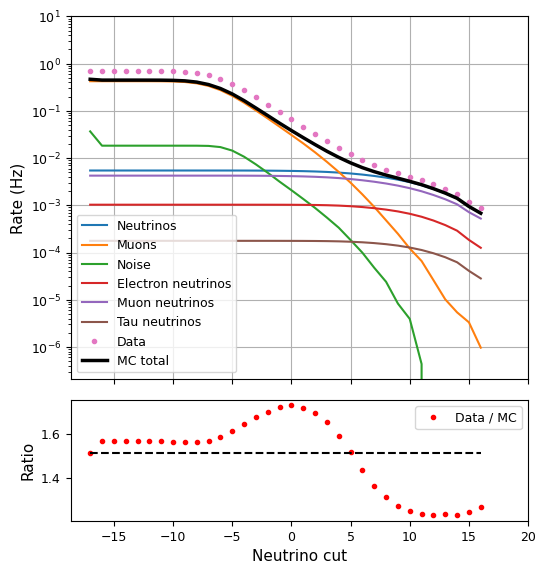

In [23]:
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.85
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])


axs[0].plot(cuts,neutrino_rates,label='Neutrinos',)
axs[0].plot(cuts,muon_rates,label='Muons')
axs[0].plot(cuts,noise_rates,label='Noise')
axs[0].plot(cuts,electron_neutrino_rates,label='Electron neutrinos')
axs[0].plot(cuts,muon_neutrino_rates,label='Muon neutrinos')
axs[0].plot(cuts,tau_neutrino_rates,label='Tau neutrinos')
axs[0].plot(cuts,RD_rates,'.',label='Data',linewidth=2.5)#,linestyle='dashed')
axs[0].plot(cuts,np.array(neutrino_rates)+np.array(muon_rates)+np.array(noise_rates),label='MC total',color='k',linewidth=2.5)
axs[0].set_ylabel('Rate (Hz)')
axs[1].set_xlabel('Neutrino cut')
axs[0].set_yscale('log')
axs[0].set_xlim(right=20)
axs[0].set_ylim(top=10)
axs[0].legend()
axs[0].grid(True)

RD_MC_ratio = RD_rates/(np.array(neutrino_rates)+np.array(muon_rates)+np.array(noise_rates))
axs[1].set_ylabel('Ratio')
axs[1].plot(cuts,RD_MC_ratio,'.',color='red',label='Data / MC')
axs[1].hlines(RD_MC_ratio[0],np.min(cuts)-0.02,np.max(cuts)+0.02,color='k',linestyles='dashed')
axs[1].legend()
fig.tight_layout()
outdir = outdir
fig.savefig(outdir+ 'MC_vs_retro_selection_old_muons_and_more_noise.png', format='png', bbox_inches='tight')

In [24]:
print(np.sum(multiclass_MC['osc_weight']))
print(np.sum(multiclass_RD['osc_weight']))
print(np.min(multiclass_MC['pid_neutrino_pred_logit']))

0.46651965324315825
0.7057766542218613
-16.118095550958316


In [25]:
i=32
print(cuts[i])
print('muon',muon_rates[i])
print('noise',noise_rates[i])
print('neutrino',neutrino_rates[i])
print(electron_neutrino_rates[i])
print(muon_neutrino_rates[i])
print(tau_neutrino_rates[i])
print(RD_rates[i])

15.0
muon 3.3215935565800185e-06
noise 0.0
neutrino 0.0009407730279523337
0.00018486375896738203
0.0007150474863055387
4.086178267941191e-05
0.0011747015364474997
